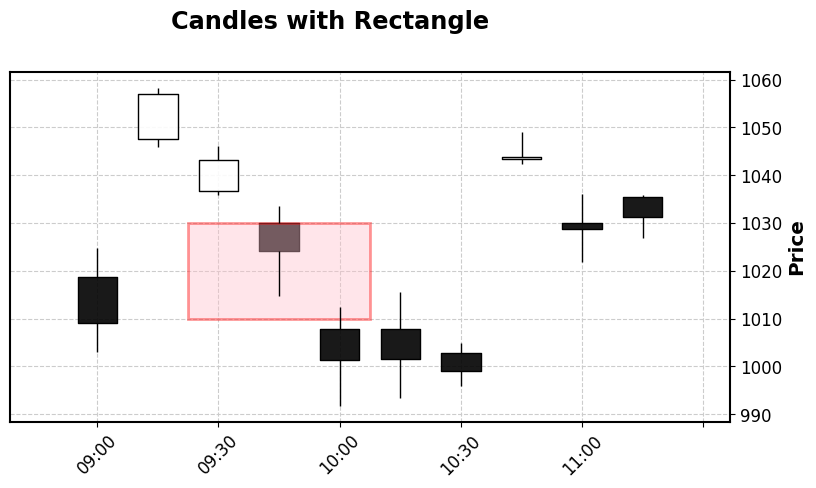

In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# -----------------------------
# Generate 10 random OHLC candles
# -----------------------------
np.random.seed(42)
dates = pd.date_range("2025-09-13 09:00", periods=10, freq="15min")
opens  = np.random.rand(10)*50 + 1000
closes = opens + (np.random.rand(10)-0.5)*20
highs  = np.maximum(opens, closes) + np.random.rand(10)*10
lows   = np.minimum(opens, closes) - np.random.rand(10)*10

df = pd.DataFrame({
    "Open": opens,
    "High": highs,
    "Low": lows,
    "Close": closes
}, index=dates)

# -----------------------------
# Function to draw rectangle by time and price
# -----------------------------
def draw_rectangle_by_time_price(df, axes, start_time, end_time, y_bottom, y_top,
                                 edgecolor='blue', facecolor='lightblue', alpha=0.3, linewidth=2):
    """
    Draw a rectangle on a candlestick chart spanning given time and price range.

    Parameters:
    - df: DataFrame with datetime index and OHLC data
    - axes: matplotlib axes object (axes[0] from mplfinance)
    - start_time, end_time: timestamps for horizontal span
    - y_bottom, y_top: price range for vertical span
    - edgecolor, facecolor, alpha, linewidth: styling
    """
    # Convert timestamps to x-axis positions
    x_start_idx = df.index.get_loc(pd.Timestamp(start_time))
    x_end_idx   = df.index.get_loc(pd.Timestamp(end_time))

    # Rectangle width and height
    width  = x_end_idx - x_start_idx + 1
    height = y_top - y_bottom

    # Draw rectangle
    rect = patches.Rectangle((x_start_idx-0.5, y_bottom), width, height,
                             edgecolor=edgecolor, facecolor=facecolor,
                             alpha=alpha, linewidth=linewidth)
    axes[0].add_patch(rect)

# -----------------------------
# Plot candlestick chart
# -----------------------------
fig, axes = mpf.plot(df, type='candle', style='classic', figsize=(10,5),
                     title="Candles with Rectangle", volume=False, returnfig=True)

# -----------------------------
# Draw a rectangle from 09:30 to 10:00 between 1010-1030
# -----------------------------
draw_rectangle_by_time_price(df, axes,
                             start_time="2025-09-13 09:30",
                             end_time="2025-09-13 10:00",
                             y_bottom=1010,
                             y_top=1030,
                             edgecolor='red',
                             facecolor='pink',
                             alpha=0.4)

plt.show()


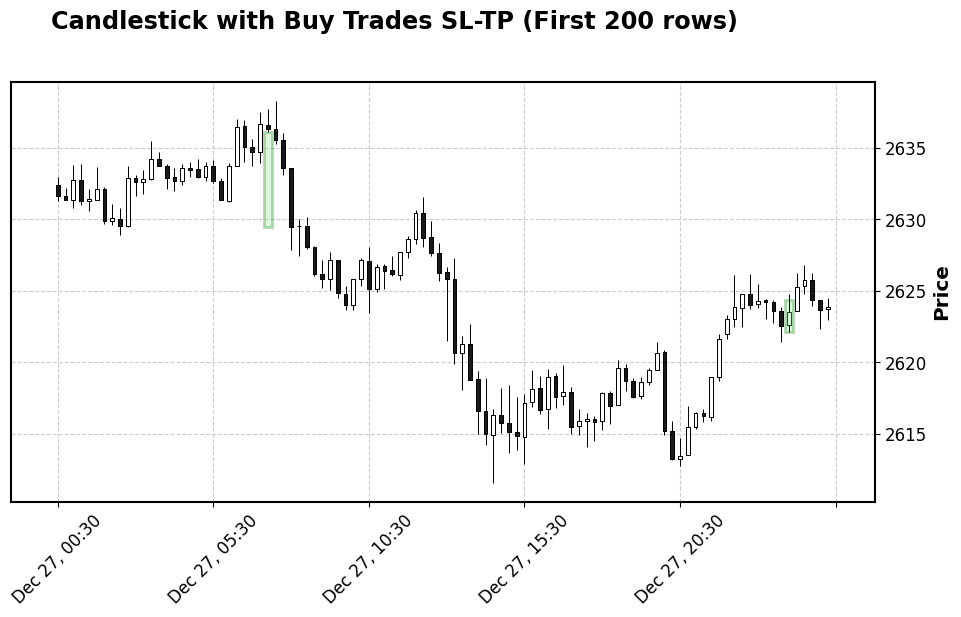

                         Open      High       Low     Close  Volume  \
DateTime                                                              
2024-12-27 07:15:00  2636.625  2637.716  2636.102  2636.347    1554   
2024-12-30 01:00:00  2622.592  2624.804  2622.113  2623.537    2920   

                           RSI        EMA21        EMA51      Diff  \
DateTime                                                             
2024-12-27 07:15:00  59.126703  2633.450381  2633.312275  0.138106   
2024-12-30 01:00:00  58.785014  2620.043476  2619.865431  0.178045   

                     CrossSignal        SL        TP  
DateTime                                              
2024-12-27 07:15:00          1.0  2636.102  2629.503  
2024-12-30 01:00:00          1.0  2622.113  2624.346  


In [2]:
import pandas as pd
import mplfinance as mpf
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
df = pd.read_csv("15MIN-Updated.csv", parse_dates=["DateTime"])
df.set_index("DateTime", inplace=True)

# Take only the first 200 rows
df = df.iloc[:100]

# -----------------------------
# Function to draw SL-TP boxes for buy trades
# -----------------------------
def draw_buy_trade_boxes(df, axes, cross_col="CrossSignal", sl_col="SL", tp_col="TP",
                         edgecolor='green', facecolor='lightgreen', alpha=0.3, linewidth=2):
    """
    Draw SL-TP rectangles for all buy trades (CrossSignal==1).
    """
    buy_trades = df[df[cross_col] == 1]

    for entry_time in buy_trades.index:
        x_start_idx = df.index.get_loc(entry_time)
        # For now, assume exit is the same candle; can extend later
        x_end_idx = x_start_idx

        y_bottom = df.loc[entry_time, sl_col]
        y_top    = df.loc[entry_time, tp_col]

        width  = x_end_idx - x_start_idx + 1
        height = y_top - y_bottom

        rect = patches.Rectangle((x_start_idx-0.5, y_bottom), width, height,
                                 edgecolor=edgecolor, facecolor=facecolor,
                                 alpha=alpha, linewidth=linewidth)
        axes[0].add_patch(rect)

# -----------------------------
# Plot candlestick chart
# -----------------------------
fig, axes = mpf.plot(df, type='candle', style='classic', figsize=(12,6),
                     title="Candlestick with Buy Trades SL-TP (First 200 rows)",
                     volume=False, returnfig=True)

# -----------------------------
# Draw buy trade boxes
# -----------------------------
draw_buy_trade_boxes(df, axes)


plt.show()

print (df[df['CrossSignal'] == 1])